In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = '../data/processed/Juegorawg_limpio.csv'
df = pd.read_csv(file_path)
df.copy()

,slug,name,playtime,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,suggestions_count,updated,reviews_count,release_year,main_genre,metacritic_category
0,hellpoint,Hellpoint,3,2020-07-30,2.76,3,51,2,2182,61.0,494,2024-11-26 14:58:37,54,2020,Indie,Media
1,anomaly-2,Anomaly 2,2,2013-05-14,2.90,4,62,0,1898,77.0,610,2024-10-07 11:59:32,62,2013,Strategy,Media
2,reverse-4,Resident Evil Re:Verse,1,2022-10-28,1.53,1,63,0,1662,78.0,456,2024-11-14 19:49:03,64,2022,Shooter,Media
3,x-morph-defense,X-Morph: Defense,3,2017-08-30,3.08,3,47,1,1657,75.0,702,2024-11-08 09:09:44,48,2017,Indie,Media
4,west-of-dead,West of Dead,1,2020-06-08,3.08,3,64,2,1634,68.0,456,2024-03-05 13:43:19,66,2020,Indie,Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,the-otterman-empire,The Otterman Empire,0,2020-07-02,0.00,0,0,0,0,76.5,333,2020-12-16 15:29:54,0,2020,Casual,Media
3764,jacks-or-better-video-poker,Jacks or Better - Video Poker,0,2020-06-12,0.00,0,0,0,0,76.5,0,2022-04-29 05:58:06,0,2020,Casual,Media
3765,jumanji-the-curse-returns,Jumanji: The Curse Returns,0,2021-09-01,0.00,0,0,0,0,76.0,251,2022-09-19 08:16:26,0,2021,Adventure,Media
3766,avocuddle,AvoCuddle,0,2019-07-12,0.00,0,0,0,0,73.0,400,2020-12-16 14:38:36,0,2019,Indie,Media


In [4]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

# # Mostrar el DataFrame completo
# print(df[['name', 'rating']])

In [5]:
df[(df['rating'] >= 0.5) & (df['rating'] <= 1.3)][['name', 'rating']]

,name,rating
546,Fly O'Clock,1.25
1142,Castle of no Escape,1.29


In [6]:
df[['name','rating']]

,name,rating
0,Hellpoint,2.76
1,Anomaly 2,2.90
2,Resident Evil Re:Verse,1.53
3,X-Morph: Defense,3.08
4,West of Dead,3.08
...,...,...
3763,The Otterman Empire,0.00
3764,Jacks or Better - Video Poker,0.00
3765,Jumanji: The Curse Returns,0.00
3766,AvoCuddle,0.00


In [7]:
df['rating'].unique()

array([2.76, 2.9 , 1.53, 3.08, 2.61, 3.24, 3.12, 2.2 , 2.22, 2.44, 2.94,
       3.  , 2.72, 3.57, 2.09, 3.42, 2.74, 3.72, 3.43, 2.63, 2.17, 3.84,
       3.16, 2.64, 3.19, 3.31, 2.83, 3.2 , 2.86, 2.78, 2.31, 3.37, 2.55,
       3.26, 3.51, 3.93, 3.55, 3.09, 3.73, 3.17, 3.48, 3.02, 3.36, 3.44,
       3.23, 3.71, 3.87, 3.77, 2.93, 2.53, 3.05, 2.32, 3.52, 2.67, 3.11,
       2.77, 2.97, 3.97, 3.45, 2.54, 2.4 , 3.22, 3.07, 2.95, 3.38, 4.22,
       3.21, 3.15, 4.17, 3.3 , 4.04, 2.43, 2.8 , 2.88, 4.  , 3.29, 3.25,
       3.06, 3.96, 2.68, 3.47, 2.84, 3.49, 2.66, 3.4 , 3.63, 2.98, 3.86,
       2.75, 2.89, 3.78, 2.35, 3.32, 3.28, 4.02, 3.56, 2.71, 3.03, 2.56,
       2.92, 3.5 , 2.45, 2.85, 2.69, 2.7 , 2.04, 3.81, 3.59, 2.47, 2.14,
       1.52, 2.5 , 3.33, 2.11, 3.64, 2.21, 2.62, 3.7 , 3.61, 3.18, 1.69,
       3.34, 3.41, 3.6 , 2.81, 2.73, 1.47, 1.88, 4.21, 2.91, 3.58, 2.07,
       2.57, 1.76, 2.41, 1.78, 3.27, 3.8 , 4.13, 3.75, 3.1 , 4.2 , 2.52,
       2.29, 2.58, 1.9 , 2.  , 4.05, 2.96, 3.66, 1.

<Axes: xlabel='rating', ylabel='Count'>

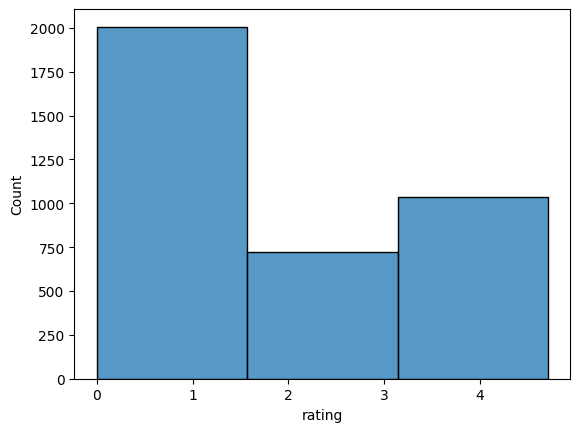

In [8]:
sns.histplot(df['rating'], bins=3)

In [9]:
df2 = df[df['rating'] > 0]

In [12]:
df2[(df2['rating'] >= 0.5) & (df2['rating'] <= 1.3)][['name', 'rating']]

,name,rating
546,Fly O'Clock,1.25
1142,Castle of no Escape,1.29


<Axes: xlabel='rating', ylabel='Count'>

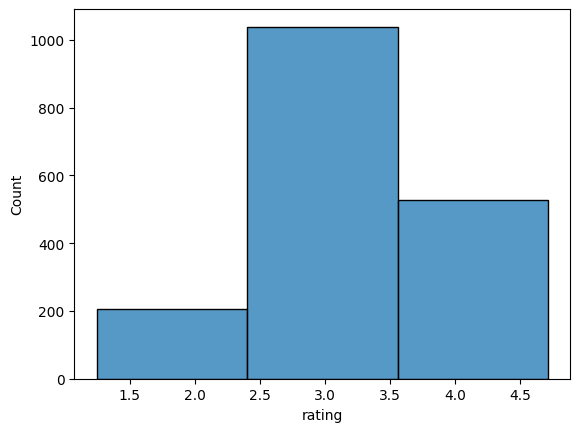

In [11]:
sns.histplot(df2['rating'], bins= 3)

In [13]:
rating_bins = [0.5, 2.5, 3.5, 5]
rating_labels = ['Bajo', 'Medio', 'Alto']
df2['rating_category'] = pd.cut(df['rating'], bins=rating_bins, labels=rating_labels)

In [15]:
print("\nnulos en rating_category:", df2['rating_category'].isnull().sum())


nulos en rating_category: 0


In [16]:
df2['rating_category'].value_counts()

rating_category
Medio    962
Alto     563
Bajo     250
Name: count, dtype: int64

In [33]:
df2['rating_to_count_ratio'] = df2['rating'] / (df2['ratings_count'] + 1)  # +1 para evitar división por cero
df2['reviews_to_ratings_ratio'] = df2['reviews_count'] / (df2['ratings_count'] + 1)
df2['popularity_score'] = (df2['ratings_count'] + df2['reviews_count'] + df2['added']) / 3
df2['recency_factor'] = 2025 - df2['release_year']  # Cuán reciente es el juego

In [34]:
# Características numéricas relevantes
selected_features = [
    'playtime',           # Tiempo de juego promedio
    'metacritic',         # Puntuación de críticos profesionales
    'ratings_count',      # Número de calificaciones (popularidad)
    'reviews_count',      # Número de reseñas
    'added',              # Veces que el juego fue añadido
    'suggestions_count',  # Número de sugerencias
    'release_year',       # Año de lanzamiento
    'rating_to_count_ratio',    # Tus características derivadas
    'reviews_to_ratings_ratio',
    'popularity_score',
    'recency_factor',
    'rating_top'
]

# Características categóricas para codificar
categorical_features = [
    'main_genre',          # Género principal del juego
    'metacritic_category'  # Categoría de Metacritic
]


In [35]:
df_encoded = pd.get_dummies(df2, columns=['main_genre', 'metacritic_category'], drop_first=True)

In [36]:
df_encoded

,slug,name,playtime,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,...,main_genre_Indie,main_genre_Massively Multiplayer,main_genre_Platformer,main_genre_Puzzle,main_genre_RPG,main_genre_Racing,main_genre_Shooter,main_genre_Strategy,metacritic_category_Baja,metacritic_category_Media
0,hellpoint,Hellpoint,3,2020-07-30,2.76,3,51,2,2182,61.0,...,True,False,False,False,False,False,False,False,False,True
1,anomaly-2,Anomaly 2,2,2013-05-14,2.90,4,62,0,1898,77.0,...,False,False,False,False,False,False,False,True,False,True
2,reverse-4,Resident Evil Re:Verse,1,2022-10-28,1.53,1,63,0,1662,78.0,...,False,False,False,False,False,False,True,False,False,True
3,x-morph-defense,X-Morph: Defense,3,2017-08-30,3.08,3,47,1,1657,75.0,...,True,False,False,False,False,False,False,False,False,True
4,west-of-dead,West of Dead,1,2020-06-08,3.08,3,64,2,1634,68.0,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,forgotten-memories,Forgotten Memories: Remastered Edition,0,2015-04-23,4.71,5,6,1,17,72.0,...,True,False,False,False,False,False,False,False,False,True
2825,destiny-house-of-wolves,Destiny: House of Wolves,0,2015-05-19,3.50,4,6,0,16,72.0,...,False,False,False,False,False,False,True,False,False,True
2827,the-ninja-saviors-return-of-the-warriors,The Ninja Saviors: Return of the Warriors,1,2019-10-15,4.33,4,5,0,16,72.0,...,False,False,False,False,False,False,False,False,False,True
3041,reaper,Reaper,0,2013-09-09,3.17,4,5,1,10,81.0,...,True,False,False,False,False,False,False,False,False,False


In [37]:
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
correlation_matrix = df_encoded[numeric_cols].corr()

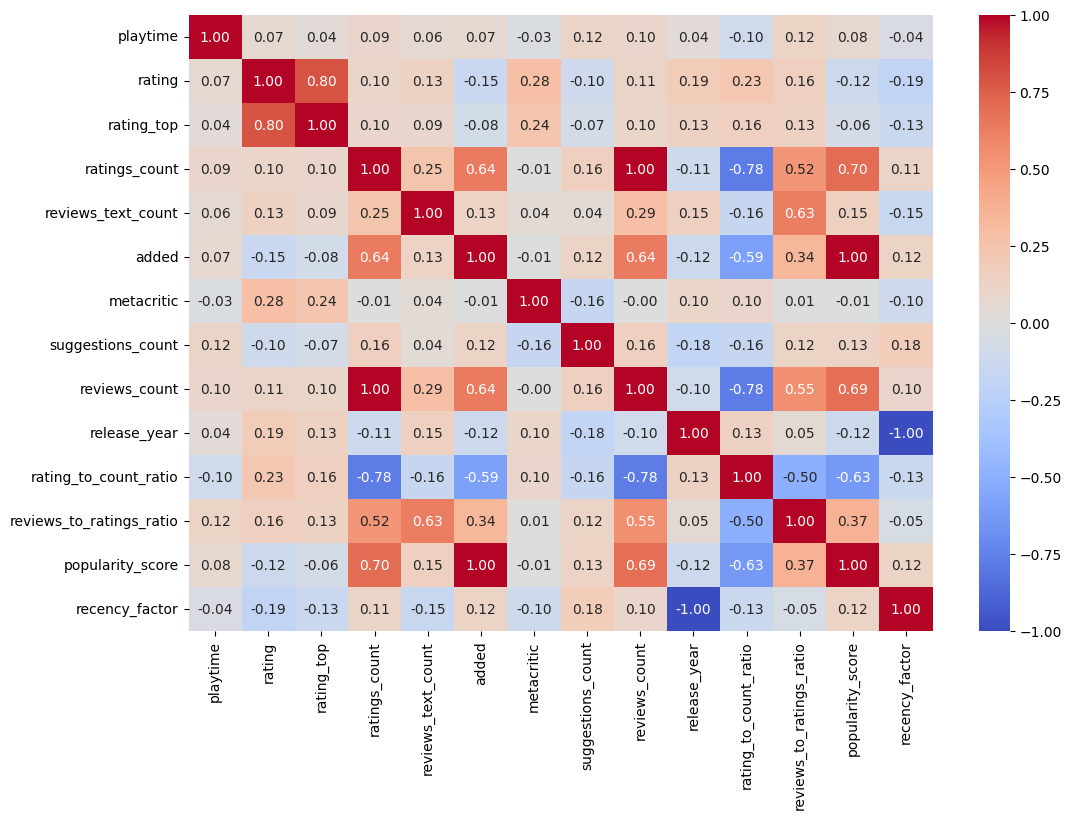

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
correlation_with_rating = correlation_matrix['rating'].sort_values(ascending=False)
correlation_with_rating = correlation_with_rating.drop('rating') 

Top 15 características con mayor correlación con rating:
rating_top                  0.796012
metacritic                  0.283143
rating_to_count_ratio       0.230015
recency_factor             -0.187515
release_year                0.187515
reviews_to_ratings_ratio    0.162084
added                      -0.145195
reviews_text_count          0.133352
popularity_score           -0.124817
reviews_count               0.109498
ratings_count               0.104046
suggestions_count          -0.102815
playtime                    0.067277
Name: rating, dtype: float64


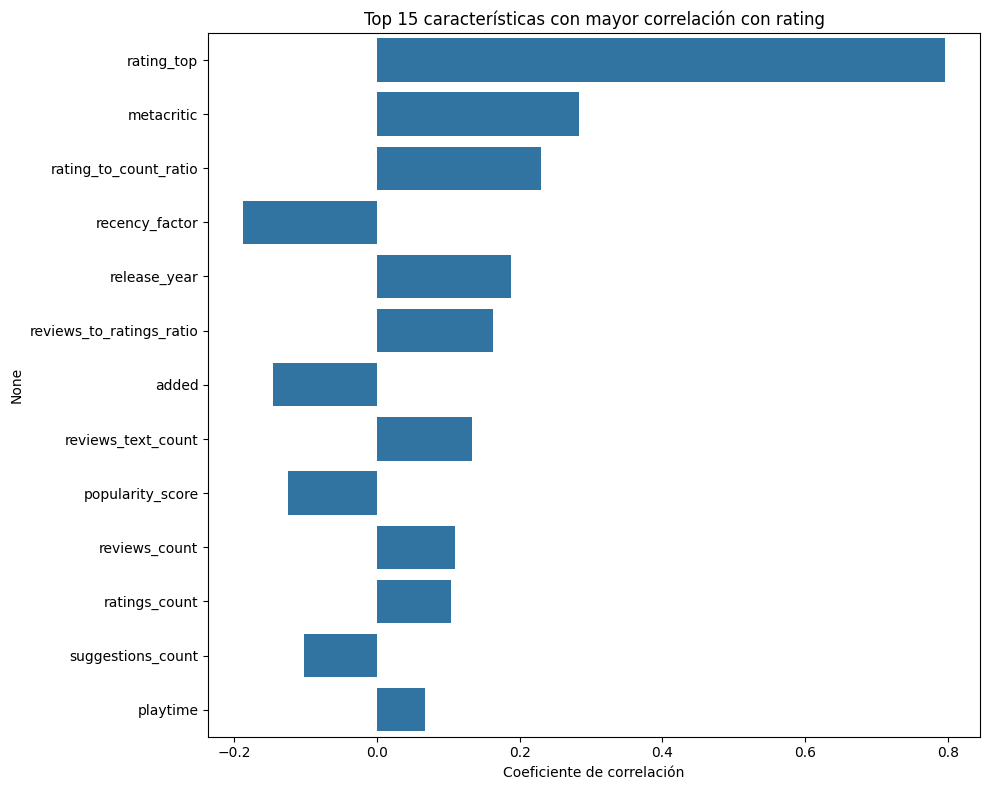

In [39]:
top_features = correlation_with_rating.abs().sort_values(ascending=False).head(15).index
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_rating[top_features], y=top_features)
plt.title('Top 15 características con mayor correlación con rating')
plt.xlabel('Coeficiente de correlación')
plt.tight_layout()


# Imprimir las correlaciones más importantes
print("Top 15 características con mayor correlación con rating:")
print(correlation_with_rating[top_features])

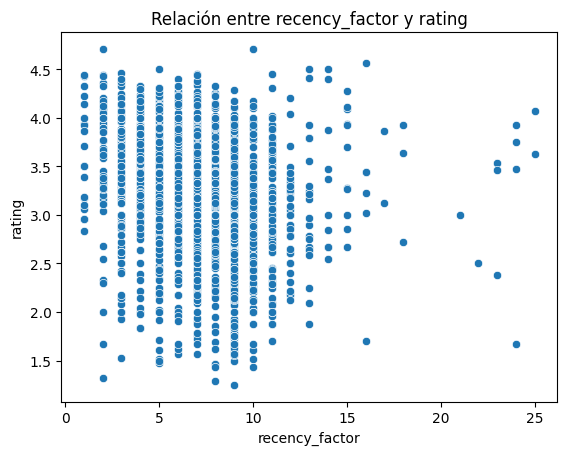

In [41]:
sns.scatterplot(x=df2['recency_factor'], y=df2['rating'])
plt.title('Relación entre recency_factor y rating')
plt.show()

In [42]:
important_features = [
   'rating_top',                  
    'metacritic',                  
    'rating_to_count_ratio',       
    'release_year',              
    'reviews_to_ratings_ratio',               
    'reviews_text_count',       
]